In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [13]:
feature=pd.read_csv("C:\\Users\\Harshavardhan\\Downloads\\walmart-recruiting-store-sales-forecasting\\features.csv.zip")
train=pd.read_csv("C:\\Users\\Harshavardhan\\Downloads\\walmart-recruiting-store-sales-forecasting\\train.csv.zip")
store=pd.read_csv("C:\\Users\\Harshavardhan\\Downloads\\walmart-recruiting-store-sales-forecasting\\stores.csv")
test=pd.read_csv("C:\\Users\\Harshavardhan\\Downloads\\walmart-recruiting-store-sales-forecasting\\test.csv.zip")


In [14]:
#data cleaning
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [15]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [16]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
#merge in one dataset
df1 = train.merge(feature, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
df = df1.merge(store, on = ['Store'], how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [18]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(421570, 16)

In [21]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [22]:
df


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [23]:
df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace = True)

In [24]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,192.308899,8.667,B,118221


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


In [26]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [27]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(keys = "Date", inplace = True)

In [29]:
df['Weekly_Sales'].dtype

dtype('float64')

In [30]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [31]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


<AxesSubplot:>

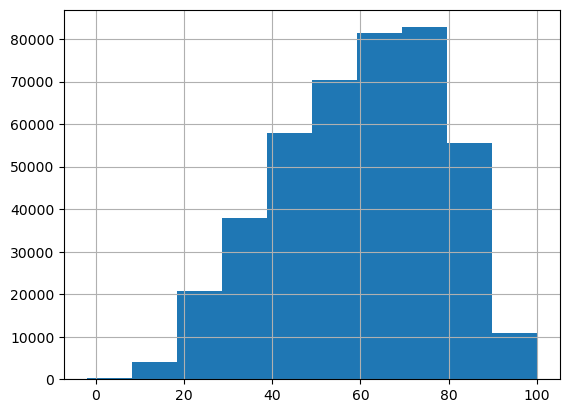

In [32]:
df['Temperature'].hist()

C:\Users\Harshavardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


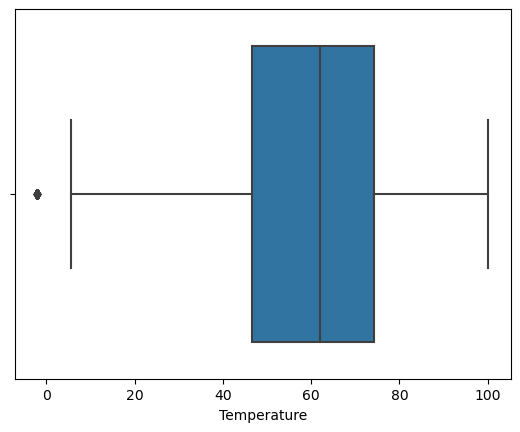

In [33]:
sns.boxplot(df['Temperature'])
plt.show()

<AxesSubplot:>

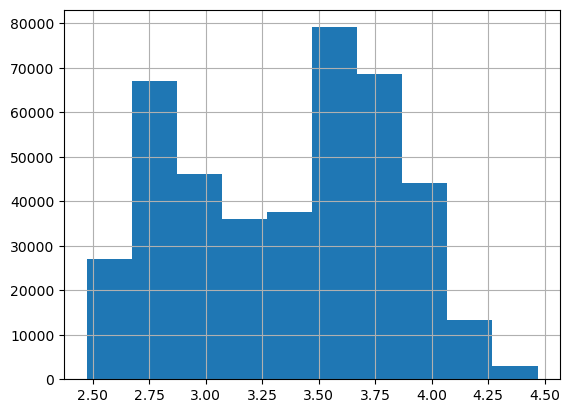

In [34]:
df['Fuel_Price'].hist()

C:\Users\Harshavardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


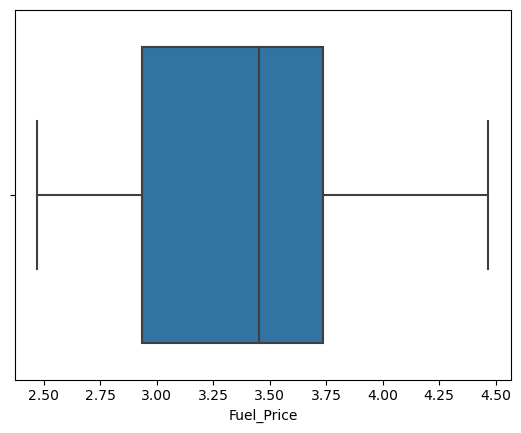

In [35]:
sns.boxplot(df['Fuel_Price'])
plt.show()

C:\Users\Harshavardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


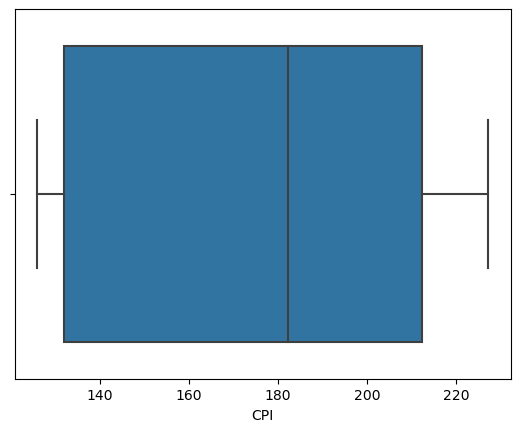

In [36]:
sns.boxplot(df['CPI'])
plt.show()

C:\Users\Harshavardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


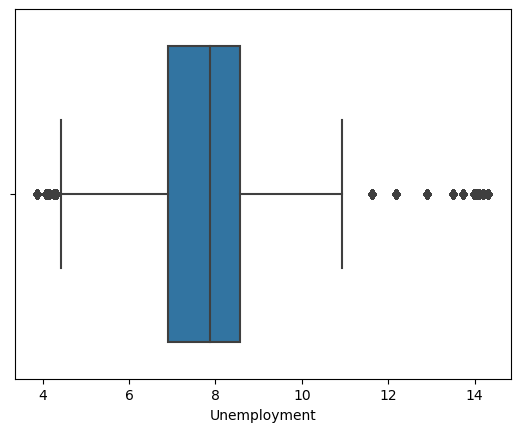

In [37]:
sns.boxplot(df['Unemployment'])
plt.show()

C:\Users\Harshavardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


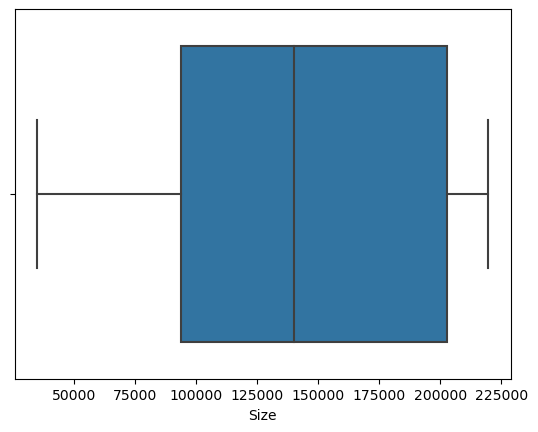

In [38]:
sns.boxplot(df['Size'])
plt.show()

In [39]:
#removing outliers
columns =['Temperature','Size']

Q3 =df[columns].quantile(.75)
Q1 =df[columns].quantile(.25)
IQR =Q3-Q1
UL =Q3 + 1.5*IQR
LL =Q1 - 1.5*IQR

for column in columns:
    df[column] = np.where(df[column] > UL[column], UL[column], np.where(df[column] < LL[column], LL[column], df[column]))

In [40]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.091260,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.444122,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,5.280000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [41]:
#test data merging
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [42]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [43]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [44]:
df_test = test.merge(feature, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
test = df_test.merge(store, on = ['Store'], how = 'inner')

In [45]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [46]:
test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace = True)

In [47]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [48]:
test['CPI']=test['CPI'].fillna(test['CPI'].mean())
test['Unemployment']=test['Unemployment'].fillna(test['Unemployment'].mean())

In [49]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315


In [50]:
test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [51]:
# Removing outliers

columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

Q3 = test[columns].quantile(.75)
Q1 = test[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 -  1.5*IQR

for column in columns:
    test[column] = np.where(test[column] > UL[column], UL[column], np.where(test[column] < LL[column], LL[column], test[column]))

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   CPI           115064 non-null  float64
 7   Unemployment  115064 non-null  float64
 8   Type          115064 non-null  object 
 9   Size          115064 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 8.9+ MB


In [53]:
test['Date'] = pd.to_datetime(test['Date'])
test.set_index(keys = 'Date', inplace = True)
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [54]:
test

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,2,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,3,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,4,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,5,False,55.32,3.386,223.462779,6.573000,A,151315.0
...,...,...,...,...,...,...,...,...,...
2013-07-26,45,93,False,76.06,3.804,176.961347,6.868733,B,118221.0
2013-07-26,45,94,False,76.06,3.804,176.961347,6.868733,B,118221.0
2013-07-26,45,95,False,76.06,3.804,176.961347,6.868733,B,118221.0


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['IsHoliday']=le.fit_transform(df['IsHoliday'])
df['Type']=le.fit_transform(df['Type'])


In [56]:
# test['IsHoliday']=le.fit_transform(df['IsHoliday'])
# test['Type']=le.fit_transform(df['Type'])

In [57]:
test

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,2,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,3,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,4,False,55.32,3.386,223.462779,6.573000,A,151315.0
2012-11-02,1,5,False,55.32,3.386,223.462779,6.573000,A,151315.0
...,...,...,...,...,...,...,...,...,...
2013-07-26,45,93,False,76.06,3.804,176.961347,6.868733,B,118221.0
2013-07-26,45,94,False,76.06,3.804,176.961347,6.868733,B,118221.0
2013-07-26,45,95,False,76.06,3.804,176.961347,6.868733,B,118221.0


In [58]:
test['IsHoliday']=le.fit_transform(test['IsHoliday'])
test['Type']=le.fit_transform(test['Type'])

In [59]:
test

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,0,55.32,3.386,223.462779,6.573000,0,151315.0
2012-11-02,1,2,0,55.32,3.386,223.462779,6.573000,0,151315.0
2012-11-02,1,3,0,55.32,3.386,223.462779,6.573000,0,151315.0
2012-11-02,1,4,0,55.32,3.386,223.462779,6.573000,0,151315.0
2012-11-02,1,5,0,55.32,3.386,223.462779,6.573000,0,151315.0
...,...,...,...,...,...,...,...,...,...
2013-07-26,45,93,0,76.06,3.804,176.961347,6.868733,1,118221.0
2013-07-26,45,94,0,76.06,3.804,176.961347,6.868733,1,118221.0
2013-07-26,45,95,0,76.06,3.804,176.961347,6.868733,1,118221.0


In [60]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315.0


In [61]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315.0
...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,93,2487.80,0,58.85,3.882,192.308899,8.667,1,118221.0
2012-10-26,45,94,5203.31,0,58.85,3.882,192.308899,8.667,1,118221.0
2012-10-26,45,95,56017.47,0,58.85,3.882,192.308899,8.667,1,118221.0


In [62]:
#correlation matrix
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050185,0.065290,-0.211088,0.208552,0.226410,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.007477,0.007837,0.003708,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002336,-0.000120,-0.020921,-0.025864,-0.182242,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155999,-0.078281,-0.001944,0.010460,-0.000798,0.000593
Temperature,-0.050185,0.004437,-0.002336,-0.155999,1.000000,0.143839,0.182183,0.096780,0.043030,-0.058395
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143839,1.000000,-0.164210,-0.033853,0.029687,0.003361
CPI,-0.211088,-0.007477,-0.020921,-0.001944,0.182183,-0.164210,1.000000,-0.299953,-0.065812,-0.003314
Unemployment,0.208552,0.007837,-0.025864,0.010460,0.096780,-0.033853,-0.299953,1.000000,0.148720,-0.068238
Type,0.226410,0.003708,-0.182242,-0.000798,0.043030,0.029687,-0.065812,0.148720,1.000000,-0.811593
Size,-0.182881,-0.002966,0.243828,0.000593,-0.058395,0.003361,-0.003314,-0.068238,-0.811593,1.000000


<AxesSubplot:>

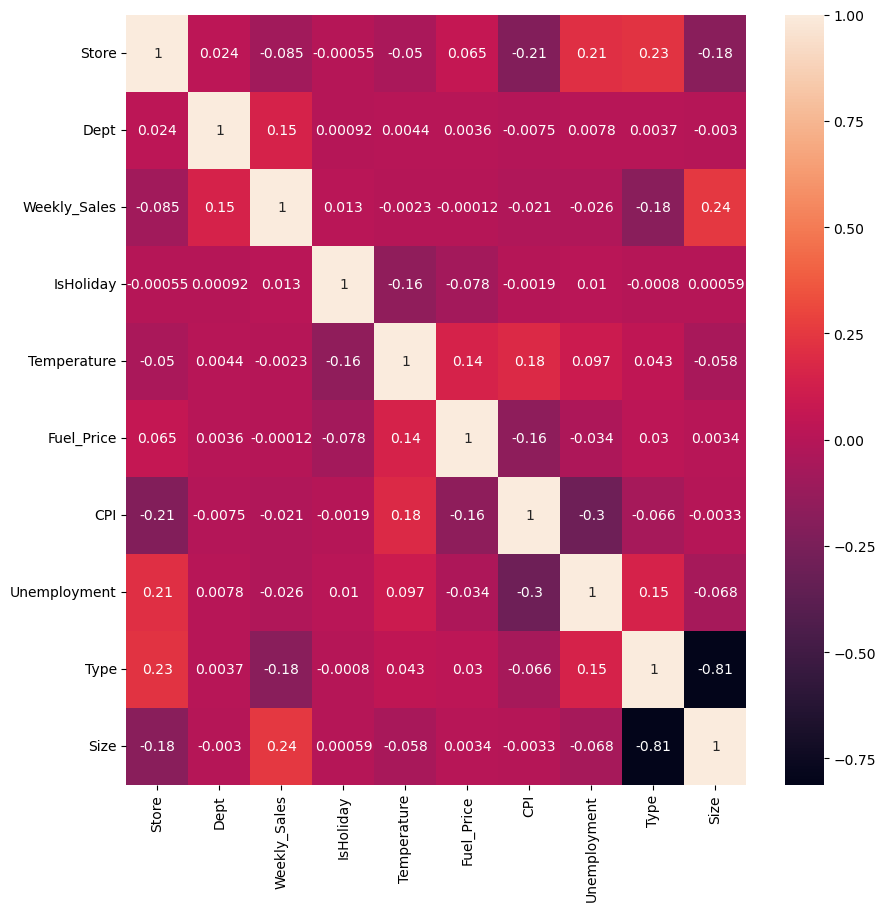

In [63]:
corr = df.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr , annot=True  ,ax=ax)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Features'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,Features,VIF
0,Store,4.459100
1,Dept,3.148374
2,Weekly_Sales,1.635812
3,IsHoliday,1.101803
4,Temperature,13.203704
5,Fuel_Price,33.841944
6,CPI,15.997205
7,Unemployment,18.269524
8,Type,4.958139
9,Size,15.823857


In [65]:
# As Size has higher VIF between Type and Size, we will drop Size

df.drop(['Size'], axis = 1, inplace = True)


<AxesSubplot:>

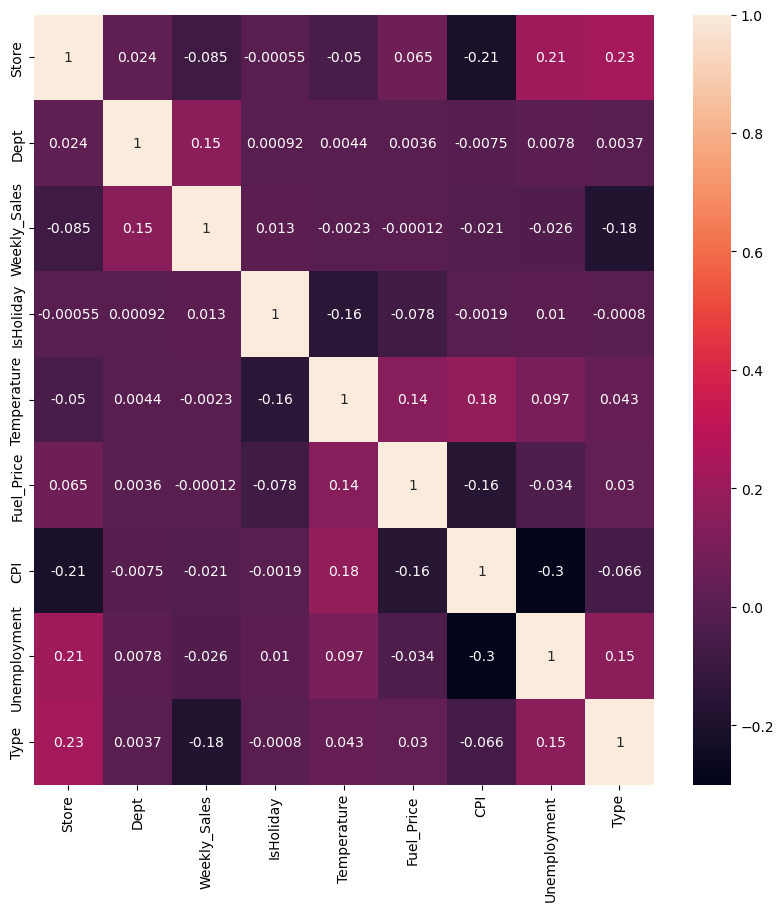

In [66]:
corr = df.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr , annot=True  ,ax=ax)

In [67]:
x=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']

In [68]:
x

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type
Date,,,,,,,,
2010-02-05,1,1,0,42.31,2.572,211.096358,8.106,0
2010-02-05,1,2,0,42.31,2.572,211.096358,8.106,0
2010-02-05,1,3,0,42.31,2.572,211.096358,8.106,0
2010-02-05,1,4,0,42.31,2.572,211.096358,8.106,0
2010-02-05,1,5,0,42.31,2.572,211.096358,8.106,0
...,...,...,...,...,...,...,...,...
2012-10-26,45,93,0,58.85,3.882,192.308899,8.667,1
2012-10-26,45,94,0,58.85,3.882,192.308899,8.667,1
2012-10-26,45,95,0,58.85,3.882,192.308899,8.667,1


In [69]:
y.head()

Date
2010-02-05    24924.50
2010-02-05    50605.27
2010-02-05    13740.12
2010-02-05    39954.04
2010-02-05    32229.38
Name: Weekly_Sales, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
dtmodel=DecisionTreeRegressor()

In [71]:
x_train,x_test,y_train,y_test= train_test_split(x , y , random_state=5,test_size=0.3)

In [72]:
print("x_train size:",x_train.shape)
print("x_test size:",x_test.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

x_train size: (295099, 8)
x_test size: (126471, 8)
y_train size: (295099,)
y_test size: (126471,)


In [73]:
from sklearn.linear_model import LinearRegression
lrmodel= LinearRegression()

In [74]:
lrmodel.fit(x_train,y_train)

LinearRegression()

In [75]:
prediction1=lrmodel.predict(x_test)

In [76]:
lrmodel.score(x_test,y_test)

0.0626358510444629

In [77]:
mse = mean_squared_error(prediction1,y_test)
print("mean sqaure error:",mse)

mean sqaure error: 489812027.2570931


In [78]:
from sklearn.metrics import r2_score
print(r2_score(y_test,prediction1))

0.0626358510444629


In [79]:
user_input=np.array([[1,1,0,42.21,2.572,211.096,8.106,0]])
prediction=lrmodel.predict(user_input)
print(prediction)

[15236.97402336]


C:\Users\Harshavardhan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
